In [1]:
import rasterio
from rasterio.mask import mask
from rasterio import Affine
import geopandas as gpd
from shapely.geometry import box
from rasterio.features import geometry_mask
import numpy as np
from shapely.geometry import mapping
from shapely.geometry import Polygon
import os
from osgeo import gdal,ogr,osr
import matplotlib.pyplot as plt

# test to create one pc img

In [2]:
# full image shape
x_test1 = gdal.Open(r'F:\wenqu\DEM\clipped_CHM\site6_b123_mean\site6_mean_site6_1_53.tif').ReadAsArray()

In [3]:
x_test2 = gdal.Open(r'F:\wenqu\trait_map\trait_clip\site6_pc\site6_pc_site6_1_53.tif').ReadAsArray()

In [4]:
x_test3 = x_test2-0.02883456*x_test1

In [8]:
x_test3.shape

(180, 179)

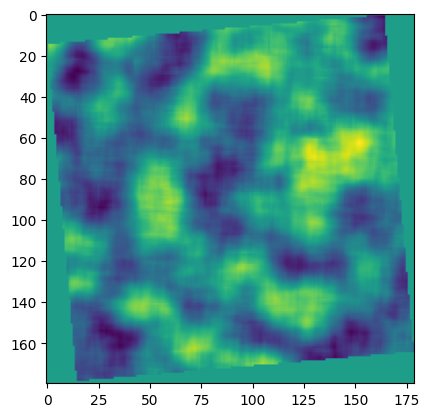

In [5]:
plt.imshow(x_test3)

In [ ]:
driver = gdal.GetDriverByName('GTiff')
driver.Register()
inDs = gdal.Open(r'F:\wenqu\DEM\clipped_CHM\site6_b123_mean\site6_mean_site6_1_53.tif')
pj = inDs.GetProjection()  ## projection
gt = inDs.GetGeoTransform()  ## geotransform
col = inDs.GetRasterBand(1).XSize
row = inDs.GetRasterBand(1).YSize
bands =1
outName = "test.tif"
outPath ='F:/wenqu/trait_map/trait_clip/site6_pc_add_chm'
out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(x_test3)

out_ds.SetProjection(pj)
out_ds.SetGeoTransform(gt)
del out_ds


# loop


In [11]:
import os
# chm_file_name = []
# img_file_name = []
img_path = r"F:\wenqu\trait_map\trait_clip\site2c_pc"  # Replace with the actual folder path
chm_path = r'F:\wenqu\DEM\clipped_CHM\site2c_b123_mean\site2c_b123_mean'
delimiter = "_site2c"

# Get all file names in the folder
file_names = [f for f in os.listdir(img_path) if os.path.isfile(os.path.join(img_path, f))]

# Extract the part of file names after the delimiter
extracted_names = [file_name.split(delimiter, 1)[1] for file_name in file_names if delimiter in file_name]

# Print the extracted names
for extracted_name in extracted_names:
    chm = 'site2c_b123_mean_site2c' + extracted_name
    print(chm)
    chm_array = gdal.Open(os.path.join(chm_path, chm)).ReadAsArray()
    
    img_name = 'site2c_pc_site2c' + extracted_name
    img_array = gdal.Open(os.path.join(img_path, img_name)).ReadAsArray()
    pc_img = img_array-0.02883456*chm_array
    print(chm_array.shape, img_array.shape, pc_img.shape)

    driver = gdal.GetDriverByName('GTiff')
    driver.Register()
    inDs = gdal.Open(os.path.join(chm_path, chm))
    pj = inDs.GetProjection()  ## projection
    gt = inDs.GetGeoTransform()  ## geotransform
    col = inDs.GetRasterBand(1).XSize
    row = inDs.GetRasterBand(1).YSize
    bands =1
    outName = 'site2c_pc_site2c' + extracted_name
    outPath ='F:/wenqu/trait_map/trait_clip/site2c_pc_add_chm'
    out_ds = driver.Create(os.path.join(outPath, outName),col,row,bands,gdal.GDT_Float32)
    out_ds.GetRasterBand(1).WriteArray(pc_img)

    out_ds.SetProjection(pj)
    out_ds.SetGeoTransform(gt)
    del out_ds


site2c_b123_mean_site2c_10_12.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_13.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_14.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_15.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_16.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_17.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_18.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_19.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_20.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_21.tif
(218, 217) (218, 217) (218, 217)
site2c_b123_mean_site2c_10_22.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_10_23.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_11_12.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_11_13.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_11_14.tif
(217, 217) (217, 217) (217, 

site2c_b123_mean_site2c_19_23.tif
(218, 217) (218, 217) (218, 217)
site2c_b123_mean_site2c_19_24.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_19_25.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_19_26.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_15.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_16.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_17.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_18.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_19.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_20.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_21.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_22.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_23.tif
(218, 217) (218, 217) (218, 217)
site2c_b123_mean_site2c_20_24.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_20_25.tif
(217, 217) (217, 217) (217, 

(217, 218) (217, 218) (217, 218)
site2c_b123_mean_site2c_30_23.tif
(217, 218) (217, 218) (217, 218)
site2c_b123_mean_site2c_30_24.tif
(217, 218) (217, 218) (217, 218)
site2c_b123_mean_site2c_30_25.tif
(218, 217) (218, 217) (218, 217)
site2c_b123_mean_site2c_30_26.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_30_27.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_30_28.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_30_29.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_30_30.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_31_18.tif
(217, 218) (217, 218) (217, 218)
site2c_b123_mean_site2c_31_19.tif
(217, 218) (217, 218) (217, 218)
site2c_b123_mean_site2c_31_20.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_31_21.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_31_22.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_31_23.tif
(217, 217) (217, 217) (217, 217)
site2c_b123_mean_site2c_31_24